In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-dev20190517


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 1s 0us/step


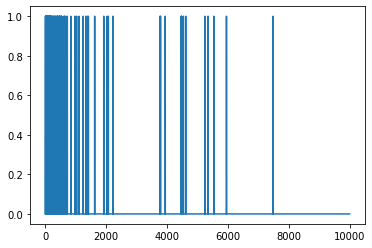

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

W0524 21:51:35.944896 15916 deprecation.py:323] From c:\users\j\documents\github\tutorials\tf_2_tutorials\venv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 12s - loss: 0.4959 - accuracy: 0.8084 - binary_crossentropy: 0.4959 - val_loss: 0.3459 - val_accuracy: 0.8728 - val_binary_crossentropy: 0.3459
Epoch 2/20
25000/25000 - 8s - loss: 0.2558 - accuracy: 0.9099 - binary_crossentropy: 0.2558 - val_loss: 0.2851 - val_accuracy: 0.8879 - val_binary_crossentropy: 0.2851
Epoch 3/20
25000/25000 - 5s - loss: 0.1850 - accuracy: 0.9354 - binary_crossentropy: 0.1850 - val_loss: 0.2895 - val_accuracy: 0.8846 - val_binary_crossentropy: 0.2895
Epoch 4/20
25000/25000 - 4s - loss: 0.1498 - accuracy: 0.9485 - binary_crossentropy: 0.1498 - val_loss: 0.3173 - val_accuracy: 0.8759 - val_binary_crossentropy: 0.3173
Epoch 5/20
25000/25000 - 5s - loss: 0.1235 - accuracy: 0.9587 - binary_crossentropy: 0.1235 - val_loss: 0.3330 - val_accuracy: 0.8744 - val_binary_crossentropy: 0.3330
Epoch 6/20
25000/25000 - 5s - loss: 0.1027 - accuracy: 0.9680 - binary_crossentropy: 0.1027 - val_loss: 0.362

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.6269 - accuracy: 0.7527 - binary_crossentropy: 0.6269 - val_loss: 0.5420 - val_accuracy: 0.8385 - val_binary_crossentropy: 0.5420
Epoch 2/20
25000/25000 - 4s - loss: 0.4478 - accuracy: 0.8782 - binary_crossentropy: 0.4478 - val_loss: 0.4064 - val_accuracy: 0.8714 - val_binary_crossentropy: 0.4064
Epoch 3/20
25000/25000 - 4s - loss: 0.3290 - accuracy: 0.9026 - binary_crossentropy: 0.3290 - val_loss: 0.3372 - val_accuracy: 0.8802 - val_binary_crossentropy: 0.3372
Epoch 4/20
25000/25000 - 4s - loss: 0.2627 - accuracy: 0.9172 - binary_crossentropy: 0.2627 - val_loss: 0.3036 - val_accuracy: 0.8852 - val_binary_crossentropy: 0.3036
Epoch 5/20
25000/25000 - 5s - loss: 0.2221 - accuracy: 0.9291 - binary_crossentropy: 0.2221 - val_loss: 0.2888 - val_accuracy: 0.8881 - val_binary_crossentropy: 0.2888
Epoch 6/20
25000/25000 - 4s - loss: 0.1945 - accuracy: 0.9360 - binary_crossentropy: 0.1945 - val_loss: 0.2829

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 11s - loss: 0.3403 - accuracy: 0.8578 - binary_crossentropy: 0.3403 - val_loss: 0.2978 - val_accuracy: 0.8788 - val_binary_crossentropy: 0.2978
Epoch 2/20
25000/25000 - 11s - loss: 0.1449 - accuracy: 0.9482 - binary_crossentropy: 0.1449 - val_loss: 0.3282 - val_accuracy: 0.8739 - val_binary_crossentropy: 0.3282
Epoch 3/20
25000/25000 - 11s - loss: 0.0488 - accuracy: 0.9855 - binary_crossentropy: 0.0488 - val_loss: 0.4484 - val_accuracy: 0.8684 - val_binary_crossentropy: 0.4484
Epoch 4/20
25000/25000 - 11s - loss: 0.0077 - accuracy: 0.9985 - binary_crossentropy: 0.0077 - val_loss: 0.5951 - val_accuracy: 0.8674 - val_binary_crossentropy: 0.5951
Epoch 5/20
25000/25000 - 11s - loss: 0.0011 - accuracy: 0.9999 - binary_crossentropy: 0.0011 - val_loss: 0.6731 - val_accuracy: 0.8696 - val_binary_crossentropy: 0.6731
Epoch 6/20
25000/25000 - 11s - loss: 2.3799e-04 - accuracy: 1.0000 - binary_crossentropy: 2.3799e-04 - va

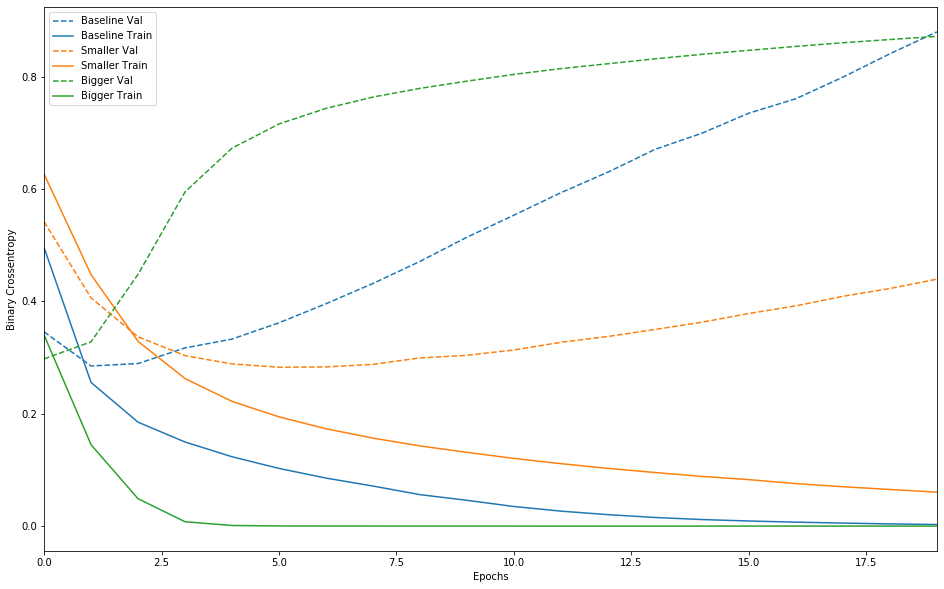

In [10]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])



In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.4865 - accuracy: 0.8188 - binary_crossentropy: 0.4444 - val_loss: 0.3582 - val_accuracy: 0.8824 - val_binary_crossentropy: 0.3138
Epoch 2/20
25000/25000 - 5s - loss: 0.2840 - accuracy: 0.9142 - binary_crossentropy: 0.2369 - val_loss: 0.3337 - val_accuracy: 0.8865 - val_binary_crossentropy: 0.2845
Epoch 3/20
25000/25000 - 5s - loss: 0.2382 - accuracy: 0.9338 - binary_crossentropy: 0.1870 - val_loss: 0.3407 - val_accuracy: 0.8847 - val_binary_crossentropy: 0.2881
Epoch 4/20
25000/25000 - 5s - loss: 0.2185 - accuracy: 0.9427 - binary_crossentropy: 0.1641 - val_loss: 0.3622 - val_accuracy: 0.8769 - val_binary_crossentropy: 0.3066
Epoch 5/20
25000/25000 - 5s - loss: 0.2033 - accuracy: 0.9510 - binary_crossentropy: 0.1467 - val_loss: 0.3725 - val_accuracy: 0.8762 - val_binary_crossentropy: 0.3150
Epoch 6/20
25000/25000 - 5s - loss: 0.1924 - accuracy: 0.9565 - binary_crossentropy: 0.1340 - val_loss: 0.3870

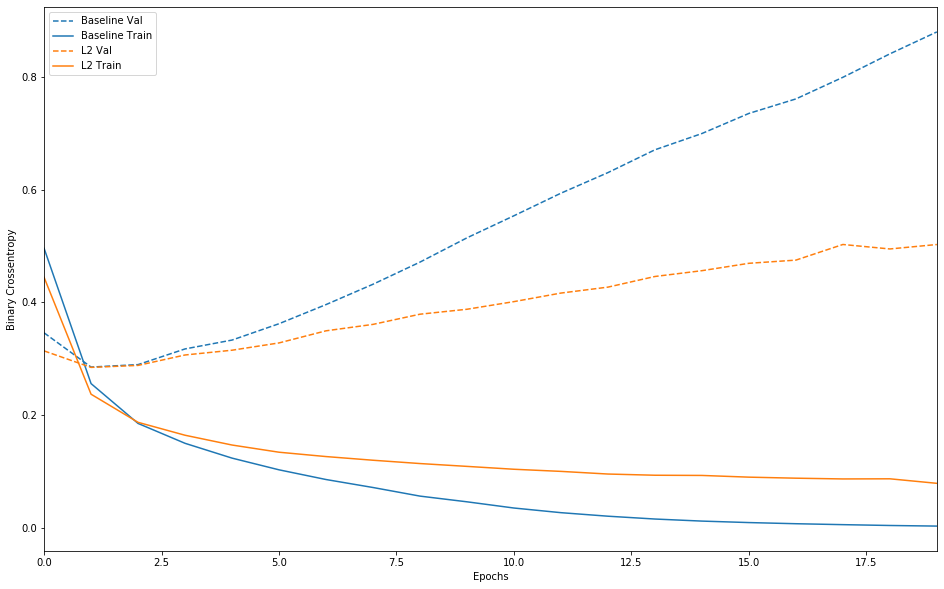

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 10s - loss: 0.6222 - accuracy: 0.6555 - binary_crossentropy: 0.6222 - val_loss: 0.4823 - val_accuracy: 0.8536 - val_binary_crossentropy: 0.4823
Epoch 2/20
25000/25000 - 6s - loss: 0.4453 - accuracy: 0.8168 - binary_crossentropy: 0.4453 - val_loss: 0.3377 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.3377
Epoch 3/20
25000/25000 - 5s - loss: 0.3473 - accuracy: 0.8706 - binary_crossentropy: 0.3473 - val_loss: 0.2904 - val_accuracy: 0.8850 - val_binary_crossentropy: 0.2904
Epoch 4/20
25000/25000 - 5s - loss: 0.2853 - accuracy: 0.9010 - binary_crossentropy: 0.2853 - val_loss: 0.2769 - val_accuracy: 0.8871 - val_binary_crossentropy: 0.2769
Epoch 5/20
25000/25000 - 4s - loss: 0.2467 - accuracy: 0.9191 - binary_crossentropy: 0.2467 - val_loss: 0.2785 - val_accuracy: 0.8881 - val_binary_crossentropy: 0.2785
Epoch 6/20
25000/25000 - 4s - loss: 0.2126 - accuracy: 0.9315 - binary_crossentropy: 0.2126 - val_loss: 0.288

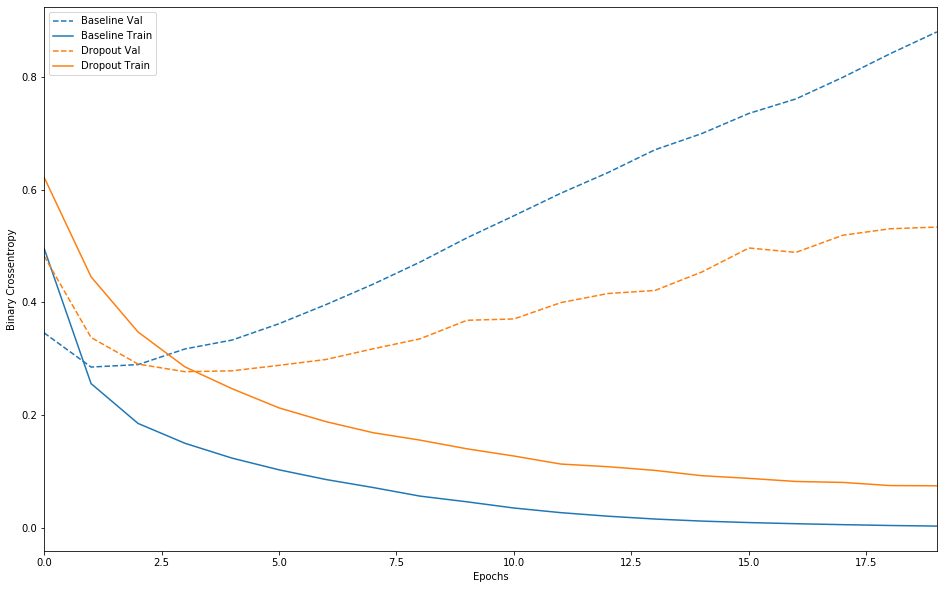

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])